# Setting Up GPU and ML Management Tools

In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="1"
# If you don't want your script to sync to the cloud
os.environ['WANDB_IGNORE_GLOBS'] = "*.patch"

In [2]:
# from comet_ml import Experiment
# import wandb

# Importing Modules

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import importlib
from joblib import dump, load
from  IPython import display
import shutil
import tempfile
import pathlib
import sys

# This allows us to import the nucml utilities
sys.path.append("..")
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50)
pd.options.mode.chained_assignment = None  # default='warn'

In [4]:
import nucml.exfor.data_utilities as exfor_utils
import nucml.endf.data_utilities as endf_utils
import nucml.plot.plotting_utilities as plot_utils
import nucml.datasets as nuc_data
import nucml.ace.data_utilities as ace_utils
import nucml.model.model_building_nn as model_tools
importlib.reload(model_tools)
importlib.reload(exfor_utils)
importlib.reload(endf_utils)
importlib.reload(plot_utils)
importlib.reload(nuc_data)
importlib.reload(ace_utils)
print("Finish importing scripts.")

Finish importing scripts.


In [5]:
# # Load the TensorBoard notebook extension
# %load_ext tensorboard

In [6]:
# %tensorboard --logdir testing_logs_2 --port=6006

# Loading EXFOR data (Energy in eV and Data in b)

In [7]:
df, x_train, x_test, y_train, y_test, to_scale, scaler = nuc_data.load_exfor(log=True, basic=0, num=True, low_en=True)

C:\Users\Pedro\Desktop\ML_Nuclear_Data\ML_Data\EXFOR_neutrons\EXFOR_neutrons_MF3_AME_no_NaNRaw.csv
Reading data into dataframe...
 MODE: neutrons
 LOW ENERGY: True
 LOG: True
 BASIC: 0
Data read into dataframe with shape:  (4184245, 10)
Dropping unnecessary features and one-hot encoding categorical columns...
Splitting dataset into training and testing...
Normalizing dataset...
Finished. Resulting dataset has shape  (4184245, 49) 
Training and Testing dataset shapes are (3765820, 48) and (418425, 48) respesctively.


In [8]:
# nn_saving_dir = '../ML_Data/Models/NN/'

# dump(scaler, open(os.path.join(nn_saving_dir, 'scaler_ext.pkl'), 'wb'))

# Creating Energy Grid

In [63]:
df = nuc_data.load_exfor()

C:\Users\Pedro\Desktop\ML_Nuclear_Data\ML_Data\EXFOR_neutrons\EXFOR_neutrons_MF3_AME_no_NaNRaw.csv
Reading data into dataframe...
 MODE: neutrons
 LOW ENERGY: False
 LOG: False
 BASIC: -1
Data read into dataframe with shape:  (4240711, 66)
Finished. Resulting dataset has shape  (4240711, 66)


In [23]:
df_copy = df.copy()

In [78]:
df["name"] = (df.MT.astype("str") + 
              df.Target_Flag.astype('str') + 
              df.Target_Element_w_A.astype("str"))

In [81]:
energy_grid = df["Energy"].unique()

In [90]:
((len(unique_names) * len(energy_grid)) / len(df)) * 5

3060.738510594096

In [82]:
unique_names = df["name"].unique()

In [14]:
for i in unique_names:
    sample = df[df.name == i]
    for e in energy_grid:
        if e in sample.Energy:
            continue
        else:
            sample = sample.append({'Energy':e, "Data":-1}, ignore_index=True)
    df = df.append(sample, ignore_index=True)

(831753,)

In [48]:
testing = pd.DataFrame(columns=df.columns)

In [50]:
testing = testing.append({'Energy':32, "Data":-1}, ignore_index=True)

In [51]:
testing

,Energy,Data,Target_Protons,Target_Neutrons,Target_Mass_Number,MT_1,MT_102,MT_16,MT_17,MT_2,MT_3,MT_4,MT_101,MT_103,MT_104,MT_41,MT_9000,MT_105,MT_32,MT_51,MT_33,MT_107,MT_24,MT_155,MT_158,MT_159,MT_108,MT_29,MT_1108,MT_113,MT_106,MT_22,MT_1003,MT_9001,MT_28,MT_111,MT_203,MT_2103,MT_112,MT_37,MT_161,MT_152,MT_153,MT_18,MT_160,Frame_L,Frame_C,Target_Flag_I,Target_Flag_N,name
0,32.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,32.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
to_append = df.iloc[-1]

In [61]:
testing = testing.fillna(to_append)

In [54]:
testing

,Energy,Data,Target_Protons,Target_Neutrons,Target_Mass_Number,MT_1,MT_102,MT_16,MT_17,MT_2,MT_3,MT_4,MT_101,MT_103,MT_104,MT_41,MT_9000,MT_105,MT_32,MT_51,MT_33,MT_107,MT_24,MT_155,MT_158,MT_159,MT_108,MT_29,MT_1108,MT_113,MT_106,MT_22,MT_1003,MT_9001,MT_28,MT_111,MT_203,MT_2103,MT_112,MT_37,MT_161,MT_152,MT_153,MT_18,MT_160,Frame_L,Frame_C,Target_Flag_I,Target_Flag_N,name
0,32.0,-1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,10100
1,32.0,-1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,10100


In [55]:
testing = testing.append(testing, ignore_index=True)

In [62]:
testing

,Energy,Data,Target_Protons,Target_Neutrons,Target_Mass_Number,MT_1,MT_102,MT_16,MT_17,MT_2,MT_3,MT_4,MT_101,MT_103,MT_104,MT_41,MT_9000,MT_105,MT_32,MT_51,MT_33,MT_107,MT_24,MT_155,MT_158,MT_159,MT_108,MT_29,MT_1108,MT_113,MT_106,MT_22,MT_1003,MT_9001,MT_28,MT_111,MT_203,MT_2103,MT_112,MT_37,MT_161,MT_152,MT_153,MT_18,MT_160,Frame_L,Frame_C,Target_Flag_I,Target_Flag_N,name
0,32.0,-1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,10100
1,32.0,-1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,10100
2,32.0,-1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,10100
3,32.0,-1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,10100


In [47]:
testing.drop_duplicates()

,Energy,Data,Target_Protons,Target_Neutrons,Target_Mass_Number,MT_1,MT_102,MT_16,MT_17,MT_2,MT_3,MT_4,MT_101,MT_103,MT_104,MT_41,MT_9000,MT_105,MT_32,MT_51,MT_33,MT_107,MT_24,MT_155,MT_158,MT_159,MT_108,MT_29,MT_1108,MT_113,MT_106,MT_22,MT_1003,MT_9001,MT_28,MT_111,MT_203,MT_2103,MT_112,MT_37,MT_161,MT_152,MT_153,MT_18,MT_160,Frame_L,Frame_C,Target_Flag_I,Target_Flag_N,name
0,32.0,-1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,10100


# Sampling Chlorine (n,p) and U-233(n,f) Data for Visualization

The model will be trained in the entire data therefore getting the total MSE. As an example, we will see the model predictions for both the mentioned reactions. 

In [9]:
kwargs = {"nat_iso": "I", "one_hot": True, "scale": True, "scaler": scaler, "to_scale": to_scale}

chlorine_35_np = exfor_utils.load_exfor_samples(df, 17, 35, "MT_103", **kwargs)
uranium_235_nt = exfor_utils.load_exfor_samples(df, 92, 235, "MT_1", **kwargs)
uranium_233_nf = exfor_utils.load_exfor_samples(df, 92, 233, "MT_18", **kwargs)
uranium_233_nt = exfor_utils.load_exfor_samples(df, 92, 233, "MT_1", one_hot=True)

Extracting samples from dataframe.
Scaling dataset...
EXFOR extracted DataFrame has shape:  (215, 49)
Extracting samples from dataframe.
Scaling dataset...
EXFOR extracted DataFrame has shape:  (40108, 49)
Extracting samples from dataframe.
Scaling dataset...
EXFOR extracted DataFrame has shape:  (94567, 49)
Extracting samples from dataframe.
EXFOR extracted DataFrame has shape:  (33384, 49)


# Time Forecasting TF Tutorial - Preparing Data for LSTM

In [107]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i)
        # Reshape data from (history_size,) to (history_size, 1)
        data.append(np.reshape(dataset[indices], (history_size, 1)))
        labels.append(dataset[i+target_size])
    return np.array(data), np.array(labels)

In [108]:
TRAIN_SPLIT = 300000

In [109]:
uni_data = uranium_233_nf["Data"]
uni_data.index = uranium_233_nf["Energy"]
uni_data.head()

Energy
-2.698666    3.250225
-2.693446    3.268578
-2.688204    3.254548
-2.682898    3.284949
-2.677595    3.299180
Name: Data, dtype: float64

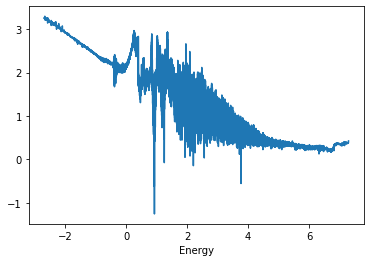

In [110]:
uni_data.plot()

In [111]:
uni_data = uni_data.values

In [112]:
univariate_past_history = 20 # PAST CROSS SECTION VALUES
univariate_future_target = 0 # INMEDIATE NEXT STEP TO PREDICT

x_train_uni, y_train_uni = univariate_data(uni_data, 0, None,
                                           univariate_past_history,
                                           univariate_future_target)

In [113]:
print ('Single window of past history')
print (x_train_uni[0])
print ('\n Target temperature to predict')
print (y_train_uni[0])

Single window of past history
[[3.25022477]
 [3.26857797]
 [3.25454808]
 [3.28494932]
 [3.29918031]
 [3.27230584]
 [3.25693412]
 [3.26112006]
 [3.20533972]
 [3.24199449]
 [3.25251323]
 [3.25534488]
 [3.25930712]
 [3.24109801]
 [3.24760506]
 [3.21724699]
 [3.23441604]
 [3.22057875]
 [3.25500702]
 [3.22274248]]

 Target temperature to predict
3.236033147117636


In [114]:
def create_time_steps(length):
    return list(range(-length, 0))

In [115]:
def show_plot(plot_data, delta, title):
    labels = ['History', 'True Future', 'Model Prediction']
    marker = ['.-', 'rx', 'go']
    time_steps = create_time_steps(plot_data[0].shape[0])
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, x in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future+5)*2])
    plt.xlabel('Time-Step')
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\Pedro\\Anaconda3\\envs\\data_mining_gpu\\lib\\site-packages\\matplotlib\\pyplot.py'>

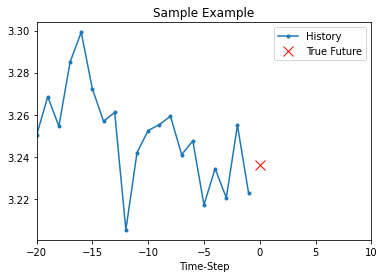

In [116]:
show_plot([x_train_uni[0], y_train_uni[0]], 0, 'Sample Example')

In [117]:
def baseline(history):
    return np.mean(history)

<module 'matplotlib.pyplot' from 'C:\\Users\\Pedro\\Anaconda3\\envs\\data_mining_gpu\\lib\\site-packages\\matplotlib\\pyplot.py'>

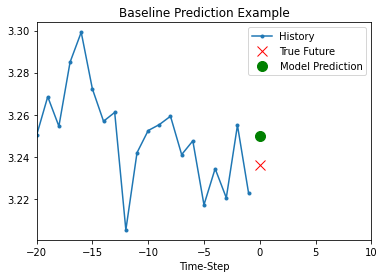

In [118]:
show_plot([x_train_uni[0], y_train_uni[0], baseline(x_train_uni[0])], 0,
           'Baseline Prediction Example')

In [119]:
import tensorflow as tf

In [120]:
BATCH_SIZE = 100
BUFFER_SIZE = len(x_train_uni)

train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

# val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
# val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

In [121]:
# TIME STEPS (ENERGY STEPS) (10), AND FEATURES (1)
x_train_uni.shape[-2:]

(20, 1)

In [122]:
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=x_train_uni.shape[-2:]),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='adam', loss='mae')

In [125]:
for x, y in train_univariate.take(1):
    print("The shape is (BATCH SIZE, FEATURES):")
    print(simple_lstm_model.predict(x).shape)

The shape is (BATCH SIZE, FEATURES):
(100, 1)


In [126]:
STEPS_PER_EPOCH = len(x_train_uni) // BATCH_SIZE

In [128]:
EVALUATION_INTERVAL = STEPS_PER_EPOCH
EPOCHS = 10

simple_lstm_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL)

Train for 945 steps
Epoch 1/10
945/945 [==============================] - 6s 6ms/step - loss: 0.1769
Epoch 2/10
945/945 [==============================] - 4s 4ms/step - loss: 0.0786
Epoch 3/10
945/945 [==============================] - 4s 4ms/step - loss: 0.0783
Epoch 4/10
945/945 [==============================] - 4s 5ms/step - loss: 0.0780
Epoch 5/10
945/945 [==============================] - 4s 5ms/step - loss: 0.0779
Epoch 6/10
945/945 [==============================] - 4s 4ms/step - loss: 0.0777
Epoch 7/10
945/945 [==============================] - 4s 4ms/step - loss: 0.0776
Epoch 8/10
945/945 [==============================] - 4s 4ms/step - loss: 0.0774
Epoch 9/10
945/945 [==============================] - 4s 4ms/step - loss: 0.0774
Epoch 10/10
945/945 [==============================] - 4s 4ms/step - loss: 0.0771


In [10]:
# for x, y in train_univariate.take(3):
#     plot = show_plot([x[0].numpy(), y[0].numpy(), simple_lstm_model.predict(x)[0]], 0, 'Simple LSTM model')
#     plot.show()

# Multivariate Time Series

In [130]:
features = uranium_233_nf[["Energy", "Data"]]
features.index = uranium_233_nf.Energy
features.head()

,Energy,Data
Energy,,
-2.698666,-2.698666,3.250225
-2.693446,-2.693446,3.268578
-2.688204,-2.688204,3.254548
-2.682898,-2.682898,3.284949
-2.677595,-2.677595,3.299180


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001EC92171B08>,
      dtype=object)

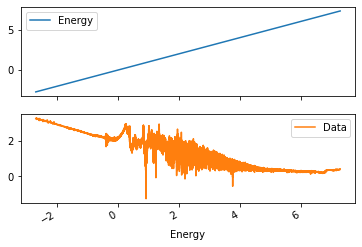

In [131]:
features.plot(subplots=True)

In [132]:
dataset = features.values

In [133]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i+target_size])
        else:
            labels.append(target[i:i+target_size])

    return np.array(data), np.array(labels)

In [134]:
past_history = 20
future_target = 5
STEP = 1

x_train_single, y_train_single = multivariate_data(dataset, dataset[:, 1], 0,
                                                   None, past_history,
                                                   future_target, STEP,
                                                   single_step=True)

In [135]:
print ('Single window of past history : {}'.format(x_train_single[0].shape))

Single window of past history : (20, 2)


In [136]:
train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

In [137]:
single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(32, input_shape=x_train_single.shape[-2:]))
single_step_model.add(tf.keras.layers.Dense(1))

single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

In [138]:
for x, y in train_data_single.take(1):
    print(single_step_model.predict(x).shape)

(100, 1)


In [139]:
single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL)

Train for 945 steps
Epoch 1/10
945/945 [==============================] - 6s 6ms/step - loss: 0.1065
Epoch 2/10
945/945 [==============================] - 4s 5ms/step - loss: 0.0912
Epoch 3/10
945/945 [==============================] - 4s 5ms/step - loss: 0.0886
Epoch 4/10
945/945 [==============================] - 4s 5ms/step - loss: 0.0872
Epoch 5/10
945/945 [==============================] - 4s 4ms/step - loss: 0.0864
Epoch 6/10
945/945 [==============================] - 4s 4ms/step - loss: 0.0856
Epoch 7/10
945/945 [==============================] - 4s 4ms/step - loss: 0.0851
Epoch 8/10
945/945 [==============================] - 4s 5ms/step - loss: 0.0847
Epoch 9/10
945/945 [==============================] - 4s 5ms/step - loss: 0.0844
Epoch 10/10
945/945 [==============================] - 4s 5ms/step - loss: 0.0842


In [140]:
def plot_train_history(history, title):
    loss = history.history['loss']
#     val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss')
#     plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(title)
    plt.legend()

    plt.show()

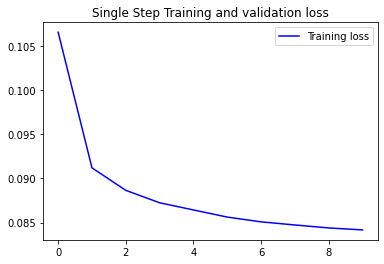

In [141]:
plot_train_history(single_step_history, 'Single Step Training and validation loss')

In [9]:
# for x, y in train_data_single.take(3):
#     plot = show_plot([x[0][:, 1].numpy(), y[0].numpy(),
#                     single_step_model.predict(x)[0]], 
#                      0, # STEP TO PREDICT
#                    'Single Step Prediction')
#     plot.show()

In [165]:
past_history = 150
future_target = 10
STEP = 1

x_train_multi, y_train_multi = multivariate_data(dataset, dataset[:, 1], 0,
                                                 None, past_history, #MAYBE CHANGE NONE FOR LEN TRAIN
                                                 future_target, STEP)

In [166]:
print ('Single window of past history : {}'.format(x_train_multi[0].shape))
print ('\n Target temperature to predict : {}'.format(y_train_multi[0].shape))

Single window of past history : (150, 2)

 Target temperature to predict : (10,)


In [167]:
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

In [168]:
def multi_step_plot(history, true_future, prediction):
    plt.figure(figsize=(12, 6))
    num_in = create_time_steps(len(history))
    num_out = len(true_future)

    plt.plot(num_in, np.array(history[:, 1]), label='History')
    plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bo',
           label='True Future')
    if prediction.any():
        plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro',
             label='Predicted Future')
    plt.legend(loc='upper left')
    plt.show()

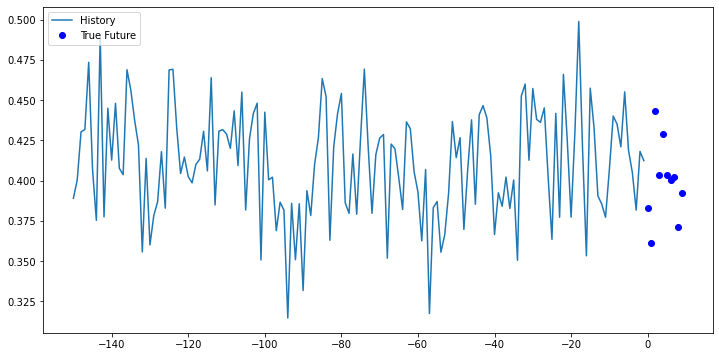

In [169]:
for x, y in train_data_multi.take(1):
    multi_step_plot(x[0], y[0], np.array([0]))

In [170]:
multi_step_model = tf.keras.models.Sequential()
multi_step_model.add(tf.keras.layers.LSTM(32,
                                          return_sequences=True,
                                          input_shape=x_train_multi.shape[-2:]))
multi_step_model.add(tf.keras.layers.LSTM(16, activation='relu'))
multi_step_model.add(tf.keras.layers.Dense(10)) # the output is the number of steps needed

multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')

In [172]:
multi_step_history = multi_step_model.fit(train_data_multi, epochs=EPOCHS,
                                          steps_per_epoch=EVALUATION_INTERVAL)

Train for 945 steps
Epoch 1/10
945/945 [==============================] - 118s 125ms/step - loss: 0.2165
Epoch 2/10
945/945 [==============================] - 116s 122ms/step - loss: 0.1001
Epoch 3/10
945/945 [==============================] - 117s 124ms/step - loss: 0.0936
Epoch 4/10
945/945 [==============================] - 116s 122ms/step - loss: 0.0906
Epoch 5/10
945/945 [==============================] - 115s 122ms/step - loss: 0.0884
Epoch 6/10
945/945 [==============================] - 116s 122ms/step - loss: 0.0869
Epoch 7/10
945/945 [==============================] - 116s 123ms/step - loss: 0.0860
Epoch 8/10
945/945 [==============================] - 115s 122ms/step - loss: 0.0851
Epoch 9/10
945/945 [==============================] - 118s 125ms/step - loss: 0.0846
Epoch 10/10
945/945 [==============================] - 121s 128ms/step - loss: 0.0842


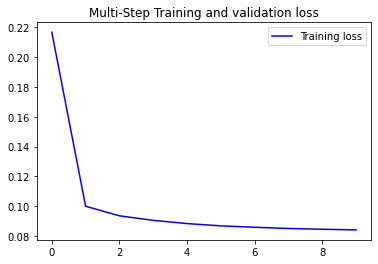

In [173]:
plot_train_history(multi_step_history, 'Multi-Step Training and validation loss')

In [22]:
# for x, y in train_data_multi.take(3):
#     multi_step_plot(x[0], y[0], multi_step_model.predict(x)[0])

# Options to create checkpoints

- Create a dE column with the difference between measurments
- Since the upper value is set we can get the difference to the max (dEmax)

In [11]:
df_copy = df.copy()

In [87]:
df = df_copy.copy()

In [88]:
df["name"] = df.Target_Protons.astype("str") + df.Target_Neutrons.astype("str") + df.Target_Mass_Number.astype("str") + df.Frame_C.astype("str") + df.Target_Flag_I.astype("str")

In [89]:
df.head()

,Energy,Data,Target_Protons,Target_Neutrons,Target_Mass_Number,MT_1,MT_102,MT_16,MT_17,MT_2,MT_3,MT_4,MT_101,MT_103,MT_104,MT_41,MT_9000,MT_105,MT_32,MT_51,MT_33,MT_107,MT_24,MT_155,MT_158,MT_159,MT_108,MT_29,MT_1108,MT_113,MT_106,MT_22,MT_1003,MT_9001,MT_28,MT_111,MT_203,MT_2103,MT_112,MT_37,MT_161,MT_152,MT_153,MT_18,MT_160,Frame_L,Frame_C,Target_Flag_I,Target_Flag_N,name
24,-3.744727,3.152288,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,10100
25,-3.455932,3.060698,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,10100
26,-3.229148,3.008600,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,10100
27,-3.107905,2.968483,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,10100
28,-2.920819,2.919078,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,10100


In [90]:
isotope_ids = df.name.unique()

In [91]:
df_ = {}

In [92]:
for i in isotope_ids:
    df_[i] = df[df.name == i] # .set_index("Energy")
    df_[i]["dE"] = df_[i]["Energy"].diff().fillna(0)
#     first_energy = df_[i]["Energy"].values[0]
    value = np.log10(2.0E7)
    df_[i]["dEmax"] = df_[i]["Energy"].apply(lambda x: value - x)

In [93]:
df_["9214123301"].head()

,Energy,Data,Target_Protons,Target_Neutrons,Target_Mass_Number,MT_1,MT_102,MT_16,MT_17,MT_2,MT_3,MT_4,MT_101,MT_103,MT_104,MT_41,MT_9000,MT_105,MT_32,MT_51,MT_33,MT_107,MT_24,MT_155,MT_158,MT_159,MT_108,MT_29,MT_1108,MT_113,MT_106,MT_22,MT_1003,MT_9001,MT_28,MT_111,MT_203,MT_2103,MT_112,MT_37,MT_161,MT_152,MT_153,MT_18,MT_160,Frame_L,Frame_C,Target_Flag_I,Target_Flag_N,name,dE,dEmax
3087270,-3.087247,3.511923,92,141,233,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,9214123301,0.000000,10.388277
3087271,-2.892790,3.420583,92,141,233,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,9214123301,0.194457,10.193820
3087272,-2.536107,3.233529,92,141,233,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,9214123301,0.356683,9.837137
3087273,-2.291579,3.111565,92,141,233,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,9214123301,0.244528,9.592609
3087274,-2.041436,2.985157,92,141,233,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,9214123301,0.250143,9.342466


In [94]:
# dataset = features.values

In [95]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        data.append(dataset[indices])

    if single_step:
        labels.append(target[i+target_size])
    else:
        labels.append(target[i:i+target_size])

    return np.array(data), np.array(labels)

In [98]:
df_["9214123301"][to_scale] = scaler.transform(df_["9214123301"][to_scale])

In [103]:
df_["9214123301"]

,Energy,Data,Target_Protons,Target_Neutrons,Target_Mass_Number,MT_1,MT_102,MT_16,MT_17,MT_2,MT_3,MT_4,MT_101,MT_103,MT_104,MT_41,MT_9000,MT_105,MT_32,MT_51,MT_33,MT_107,MT_24,MT_155,MT_158,MT_159,MT_108,MT_29,MT_1108,MT_113,MT_106,MT_22,MT_1003,MT_9001,MT_28,MT_111,MT_203,MT_2103,MT_112,MT_37,MT_161,MT_152,MT_153,MT_18,MT_160,Frame_L,Frame_C,Target_Flag_I,Target_Flag_N,name,dE,dEmax
3087270,-3.087247,3.511923,1.126578,1.107167,1.113832,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,9214123301,0.000000,10.388277
3087271,-2.892790,3.420583,1.126578,1.107167,1.113832,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,9214123301,0.194457,10.193820
3087272,-2.536107,3.233529,1.126578,1.107167,1.113832,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,9214123301,0.356683,9.837137
3087273,-2.291579,3.111565,1.126578,1.107167,1.113832,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,9214123301,0.244528,9.592609
3087274,-2.041436,2.985157,1.126578,1.107167,1.113832,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,9214123301,0.250143,9.342466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3220188,-0.677781,1.120574,1.126578,1.107167,1.113832,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,9214123301,0.066947,7.978811
3220189,-0.602060,1.127105,1.126578,1.107167,1.113832,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,9214123301,0.075721,7.903090
3220190,-0.522879,1.123852,1.126578,1.107167,1.113832,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,9214123301,0.079181,7.823909
3220191,-0.431798,1.113943,1.126578,1.107167,1.113832,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,9214123301,0.091080,7.732828


In [99]:
past_history = 5
future_target = 1
STEP = 1

x_train_single, y_train_single = multivariate_data(df_["9214123301"].drop(columns=["Data"]).values, 
                                                   df_["9214123301"]["Data"].values, 0,
                                                   None, past_history,
                                                   future_target, STEP,
                                                   single_step=True)
# x_val_single, y_val_single = multivariate_data(dataset, dataset[:, 1],
#                                                TRAIN_SPLIT, None, past_history,
#                                                future_target, STEP,
#                                                single_step=True)

In [100]:
print('Single window of past history : {}'.format(x_train_single[0].shape))

Single window of past history : (5, 51)


In [101]:
def multi_step_plot(history, true_future, prediction):
    plt.figure(figsize=(12, 6))
    num_in = create_time_steps(len(history))
    num_out = len(true_future)

    plt.plot(num_in, np.array(history[:, 1]), label='History')
    plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bo',
           label='True Future')
    if prediction.any():
        plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro',
                 label='Predicted Future')
    plt.legend(loc='upper left')
    plt.show()

In [102]:
for x, y in train_data_multi.take(1):
    multi_step_plot(x[0], y[0], np.array([0]))

NameError: name 'train_data_multi' is not defined

In [ ]:
window_size = 10
batch_size = 32

In [32]:
df_["10100"]

,Data,Target_Protons,Target_Neutrons,Target_Mass_Number,MT_1,MT_102,MT_16,MT_17,MT_2,MT_3,MT_4,MT_101,MT_103,MT_104,MT_41,MT_9000,MT_105,MT_32,MT_51,MT_33,MT_107,MT_24,MT_155,MT_158,MT_159,MT_108,MT_29,MT_1108,MT_113,MT_106,MT_22,MT_1003,MT_9001,MT_28,MT_111,MT_203,MT_2103,MT_112,MT_37,MT_161,MT_152,MT_153,MT_18,MT_160,Frame_L,Frame_C,Target_Flag_I,Target_Flag_N,name
Energy,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-3.744727,3.152288,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,10100
-3.455932,3.060698,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,10100
-3.229148,3.008600,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,10100
-3.107905,2.968483,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,10100
-2.920819,2.919078,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,10100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6.955688,0.544068,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,10100
6.964731,0.485721,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,10100
6.973128,0.457882,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,10100


In [ ]:
BATCH_SIZE = 256
BUFFER_SIZE = len(x_train_single)

train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

# val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
# val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

In [ ]:
for i in df_.keys():
    shuffle_buffer_size = len(df_[i])
    train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])


In [18]:
uranium_233_nf = exfor_utils.load_exfor_samples(df, 92, 233, "MT_18", **kwargs)

Extracting samples from dataframe.
Scaling dataset...
EXFOR extracted DataFrame has shape:  (94567, 49)


In [19]:
uranium_233_nf = uranium_233_nf.set_index("Energy")
uranium_233_nf.head()

,Data,Target_Protons,Target_Neutrons,Target_Mass_Number,MT_1,MT_102,MT_16,MT_17,MT_2,MT_3,MT_4,MT_101,MT_103,MT_104,MT_41,MT_9000,MT_105,MT_32,MT_51,MT_33,MT_107,MT_24,MT_155,MT_158,MT_159,MT_108,MT_29,MT_1108,MT_113,MT_106,MT_22,MT_1003,MT_9001,MT_28,MT_111,MT_203,MT_2103,MT_112,MT_37,MT_161,MT_152,MT_153,MT_18,MT_160,Frame_L,Frame_C,Target_Flag_I,Target_Flag_N
Energy,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-2.698666,3.250225,1.126578,1.107158,1.113827,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
-2.693446,3.268578,1.126578,1.107158,1.113827,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
-2.688204,3.254548,1.126578,1.107158,1.113827,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
-2.682898,3.284949,1.126578,1.107158,1.113827,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
-2.677595,3.299180,1.126578,1.107158,1.113827,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0


In [22]:
uranium_233_nf = uranium_233_nf.loc[:, (uranium_233_nf != 0).any(axis=0)]
uranium_233_nf.head()

,Data,Target_Protons,Target_Neutrons,Target_Mass_Number,MT_18,Frame_L,Target_Flag_I
Energy,,,,,,,
-2.698666,3.250225,1.126578,1.107158,1.113827,1,1,1
-2.693446,3.268578,1.126578,1.107158,1.113827,1,1,1
-2.688204,3.254548,1.126578,1.107158,1.113827,1,1,1
-2.682898,3.284949,1.126578,1.107158,1.113827,1,1,1
-2.677595,3.299180,1.126578,1.107158,1.113827,1,1,1


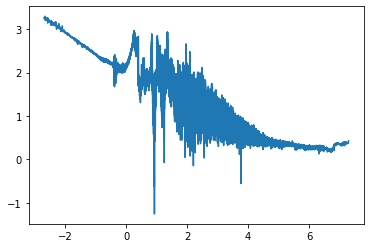

In [28]:
plt.plot(uranium_233_nf.index.values, uranium_233_nf.Data)

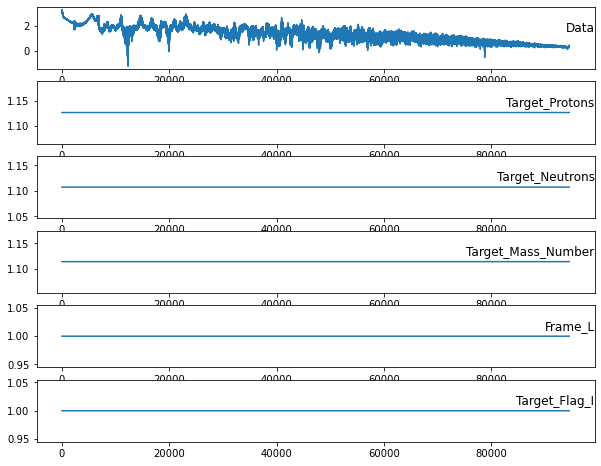

In [27]:
values = uranium_233_nf.values
# specify columns to plot
groups = [0, 1, 2, 3, 5, 6]
i = 1
# plot each column
plt.figure(figsize=(10,8))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(uranium_233_nf.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

In [35]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [36]:
uranium_233_nf = exfor_utils.load_exfor_samples(df, 92, 233, "MT_18", **kwargs)
uranium_233_nf = uranium_233_nf.set_index("Energy")
uranium_233_nf = uranium_233_nf.loc[:, (uranium_233_nf != 0).any(axis=0)]
values = uranium_233_nf.values
uranium_233_nf.head()

Extracting samples from dataframe.
Scaling dataset...
EXFOR extracted DataFrame has shape:  (94567, 49)


,Data,Target_Protons,Target_Neutrons,Target_Mass_Number,MT_18,Frame_L,Target_Flag_I
Energy,,,,,,,
-2.698666,3.250225,1.126578,1.107158,1.113827,1,1,1
-2.693446,3.268578,1.126578,1.107158,1.113827,1,1,1
-2.688204,3.254548,1.126578,1.107158,1.113827,1,1,1
-2.682898,3.284949,1.126578,1.107158,1.113827,1,1,1
-2.677595,3.299180,1.126578,1.107158,1.113827,1,1,1


In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
# # load dataset
# dataset = read_csv('pollution.csv', header=0, index_col=0)
# values = dataset.values
# # integer encode direction
# encoder = LabelEncoder()
# values[:,4] = encoder.fit_transform(values[:,4])
# # ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

In [40]:
scaled

array([[0.9892596 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.99328613, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.990208  , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.35900873, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.3603968 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.36940634, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [39]:
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t)
1,0.989260,0.0,0.0,0.0,0.0,0.0,0.0,0.993286,0.0,0.0,0.0,0.0,0.0,0.0
2,0.993286,0.0,0.0,0.0,0.0,0.0,0.0,0.990208,0.0,0.0,0.0,0.0,0.0,0.0
3,0.990208,0.0,0.0,0.0,0.0,0.0,0.0,0.996878,0.0,0.0,0.0,0.0,0.0,0.0
4,0.996878,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0
5,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.994104,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94562,0.359606,0.0,0.0,0.0,0.0,0.0,0.0,0.360790,0.0,0.0,0.0,0.0,0.0,0.0
94563,0.360790,0.0,0.0,0.0,0.0,0.0,0.0,0.358809,0.0,0.0,0.0,0.0,0.0,0.0
94564,0.358809,0.0,0.0,0.0,0.0,0.0,0.0,0.359009,0.0,0.0,0.0,0.0,0.0,0.0
94565,0.359009,0.0,0.0,0.0,0.0,0.0,0.0,0.360397,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
# drop columns we don't want to predict
reframed.drop(reframed.columns[[8,10,11,12,13]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.989260        0.0        0.0        0.0        0.0        0.0   
2   0.993286        0.0        0.0        0.0        0.0        0.0   
3   0.990208        0.0        0.0        0.0        0.0        0.0   
4   0.996878        0.0        0.0        0.0        0.0        0.0   
5   1.000000        0.0        0.0        0.0        0.0        0.0   

   var7(t-1)   var1(t)  var3(t)  
1        0.0  0.993286      0.0  
2        0.0  0.990208      0.0  
3        0.0  0.996878      0.0  
4        0.0  1.000000      0.0  
5        0.0  0.994104      0.0  
